In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from py_wake.wind_turbines import WindTurbine
from py_wake.site import UniformSite
from py_wake import BastankhahGaussian
from py_wake.superposition_models import CumulativeWakeSum
import py_wake.superposition_models as spm
print([model for model in dir(spm) if not model.startswith('_')])
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular

['ABC', 'AddedTurbulenceSuperpositionModel', 'CumulativeWakeSum', 'LinearSum', 'MaxSum', 'SqrMaxSum', 'SquaredSum', 'SuperpositionModel', 'WeightedSum', 'abstractmethod', 'cabs', 'na', 'np']


In [1]:
def MySite():
    # Define wind directions and speeds
    wind_directions = np.arange(0, 360, 10)
    wind_speeds = np.arange(0, 25, 1)

    # Set equal probabilities for wind directions and speeds
    p_wd = np.ones_like(wind_directions) / len(wind_directions)
    p_ws = np.ones_like(wind_speeds) / len(wind_speeds)

    # Create UniformSite (Only p_wd and ti are needed)
    site = UniformSite(p_wd=p_wd, ti=0.1)

    # Return site, wind directions, wind speeds
    return site, wind_directions, site.default_ws, p_wd, p_ws

In [2]:
def MyWindTurbine(D, z_h):
      # Wind speed (m/s), power (kW), and thrust coefficient (Ct)
      u = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
      power = [0, 0, 50, 108, 177, 256, 500, 780, 1050, 1350, 1600, 1800, 1800,  1800, 
                             1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800]

      ct = [0.00, 0.00, 0.80, 0.80, 0.80, 0.80, 0.80, 0.80, 0.80, 0.80, 0.80, 0.80, 0.80, 0.80,
             0.70, 0.6, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,]

      return WindTurbine(name="MyWT", diameter=D, hub_height=z_h, powerCtFunction=PowerCtTabular(u, power, 'kW', ct)), u

In [3]:
def turbine_placement(D, s_x, s_y, rows, cols):
    x = np.array([i * s_x for i in range(cols) for _ in range(rows)])
    y = np.array([j * s_y for _ in range(cols) for j in range(rows)])
    return x, y

In [4]:
D = 100  # Diameter of the wind turbine (m)
z_h = 100 # Hub height of the wind turbine (m)

# Define custom wind farm layout (x, y positions in meters)
s_x = 7 * D # Spacing between turbines in x-direction
s_y = 7 * D # Spacing between turbines in y-direction

# Example usage
x, y = turbine_placement(D, s_x, s_y, cols=3, rows=1)

# Unpack returned values
site, wind_directions, wind_speeds, p_wd, p_ws = MySite()

# Create wind turbine
#MyWindTurbine, u = MyWindTurbine(D, z_h)

u = np.arange(0, 25.5, .5)
po = [0, 0, 0, 0, 5, 15, 37, 73, 122, 183, 259, 357, 477, 622, 791, 988, 1212, 1469, 1755, 2009, 2176, 2298, 2388, 2447, 2485, 2500, 2500, 2500,
      2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
      2500, 2500, 2500, 2500, 2500, 2500, 2500, 0]
ct = [0, 0, 0, 0, 0.78, 0.77, 0.78, 0.78, 0.77, 0.77, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.77, 0.77, 0.77, 0.76, 0.73, 0.7, 0.68, 0.52, 0.42,
      0.36, 0.31, 0.27, 0.24, 0.22, 0.19, 0.18, 0.16, 0.14, 0.13, 0.12, 0.11, 0.1, 0.09, 0.08, 0.08, 0.08, 0.07, 0.07, 0.06, 0.06, 0.06,
      0.05, 0.05, 0.05, 0.04, 0]

wt1 = WindTurbine(name="Ørsted1", diameter=120, hub_height=100, powerCtFunction=PowerCtTabular(u, po, 'kw', ct))

U_hT = u[10]  # Wind speed at hub height of the wind turbine (m/s) (U_ht = index)
wd = 270  # Wind direction (degrees)

NameError: name 'np' is not defined

In [ ]:
# Use Bastankhah Gaussian wake model with Energy Summation superpositioni
wake_model = BastankhahGaussian(site, wt1, superpositionModel=CumulativeWakeSum())

# Run the simulation
sim_res = wake_model(x, y, wd=wind_directions, ws=wind_speeds)

# Extract results
power_output = sim_res.aep().sum()  # Annual Energy Production sum in GWh
print(f"Total AEP (GWh): {power_output:.2f}")

Total AEP (GWh): 64.64


/Users/madslangkjaerjakobsen/miniconda3/envs/EnergyAnalysis/lib/python3.11/site-packages/py_wake/deficit_models/gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014')


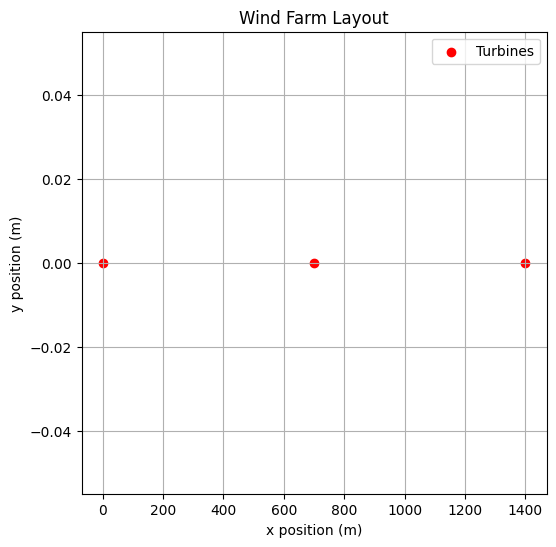

In [ ]:
# --- Visualization: Wind Farm Layout ---
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color="red", marker="o", label="Turbines")
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.title("Wind Farm Layout")
plt.legend()
plt.grid(True)
plt.show()

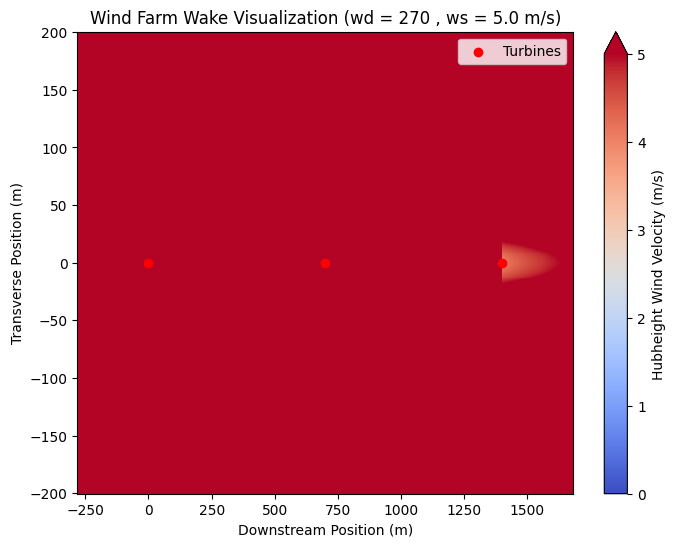

In [ ]:
# --- Wake Visualization ---
fig, ax = plt.subplots(figsize=(8, 6))

# Compute the flow map
flow_map = sim_res.flow_map()
wake_map = flow_map.sel(wd=wd, ws=U_hT, method="nearest")
vmin, vmax = 0, U_hT

wake_map.WS_eff.plot(ax=ax, cmap="coolwarm", vmin=vmin, vmax=vmax, cbar_kwargs={'label': 'Hubheight Wind Velocity (m/s)'})

# Plot turbine positions
ax.scatter(x, y, color="red", marker="o", label="Turbines")
ax.set_title("Wind Farm Wake Visualization (wd = " + str(wd) + " , ws = " + str(U_hT) + " m/s)")
ax.set_xlabel("Downstream Position (m)")
ax.set_ylabel("Transverse Position (m)")
ax.legend()
plt.show()